In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

plt.rcdefaults()

In [13]:
asymptote_sample_size = 10
snap_index = 0

In [3]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

In [4]:
omega_index = 2 # while we debug, we confine our attention to just one value
onh2 = spectra.omegas_nu[omega_index]
onh2_str = spectra.omnu_strings[omega_index]

In [5]:
# It's a waste of time to consider all of the omegas and snapshots, so we're
# making heavy use of skips.
spec_sims = spectra.better_battery(spectra.omegas_nu, spectra.omnu_strings,
    skips_omega = [0, 1], skips_model=[8], skips_snapshot=[1, 2, 3],
    h_units=False)

0
1
2


In [6]:
data = spec_sims[onh2_str]
#data = spectra.powernu3[onh2_str]
dTitle = "Lukas"
#dTitle = "Ariel III"

fig, axs = plt.subplots()
spectra.model_ratios_true(
    4, spec_sims[onh2_str], axs, massive='x', skips=[7, 8], omnuh2_str=onh2_str,
    title="Simulation attempt");

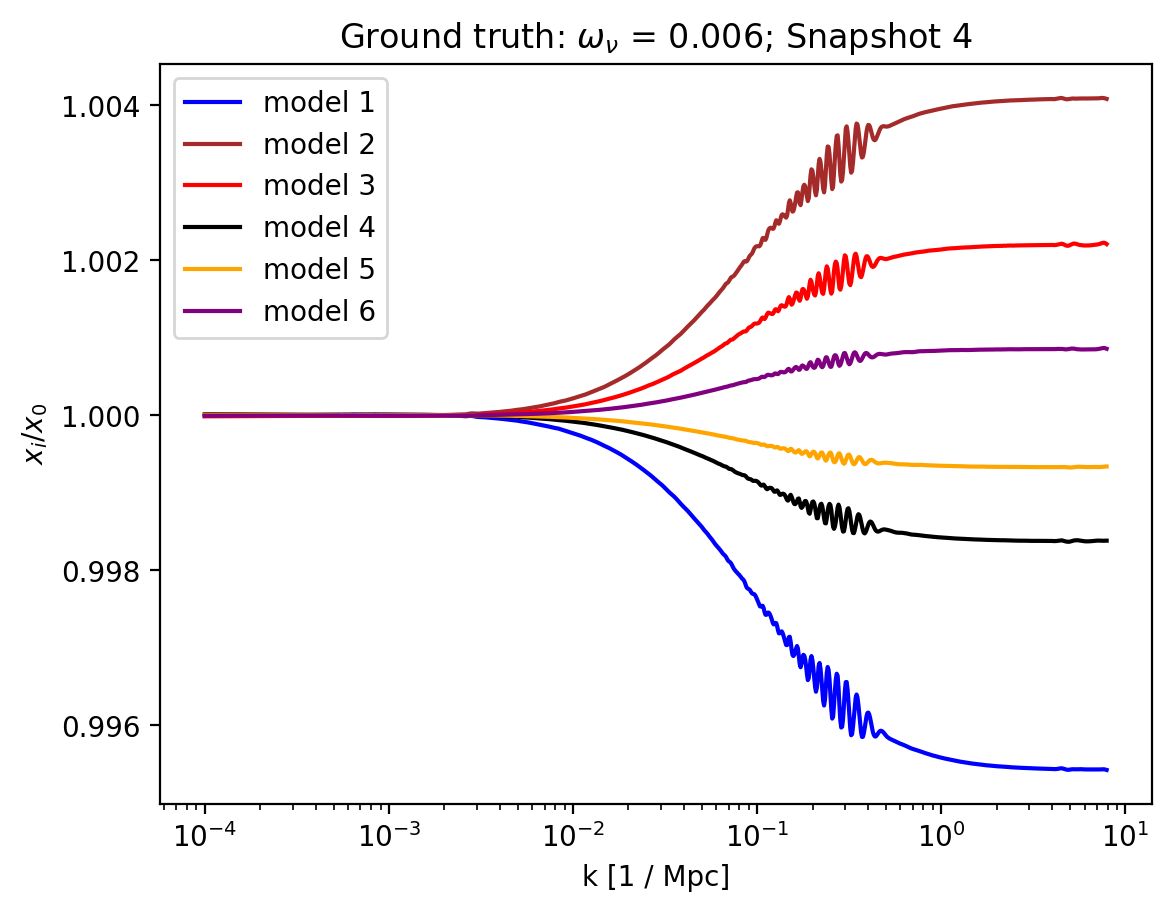

In [7]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu[onh2_str], axs,
    massive='x', skips=[7, 8], omnuh2_str=onh2_str);

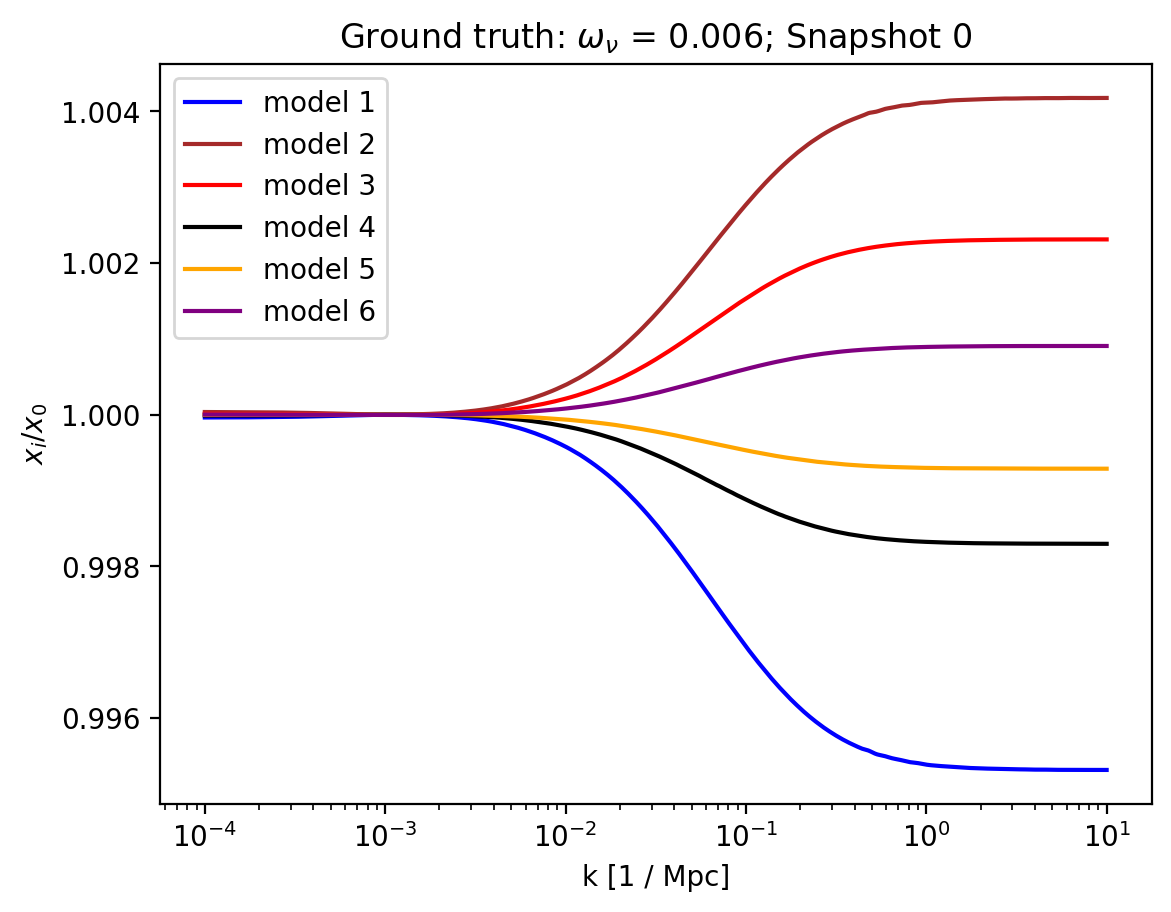

In [8]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(snap_index, data, axs,
    massive='x', skips=[7, 8], omnuh2_str=onh2_str);

In [17]:
# Be careful with the indexing here; rats[0] is the ratio of model 1 to model 0
#true_asymptotes = np.array([rats[i][len(rats[i]) - 1] for i in range(len(rats))])
true_asymptotes = []
for model_i in range(len(rats)):
    tail_start_idx = len(rats[model_i]) - asymptote_sample_size
    tail = rats[model_i][tail_start_idx:len(rats[model_i])]
    true_asymptotes.append(np.average(tail))
true_asymptotes = np.array(true_asymptotes)
    
zc_asymptotes = true_asymptotes - 1

In [18]:
true_asymptotes

array([0.99531497, 1.00417796, 1.00231219, 0.9982974 , 0.99928813,
       1.00090659])

In [31]:
sample_size_comparisons = []
for samp_size in range(1, 100):
    sample_size_comparisons.append([])
    for model_i in range(len(rats)):
        tail_start_idx = len(rats[model_i]) - samp_size
        tail = rats[model_i][tail_start_idx:len(rats[model_i])]
        this_asys = sample_size_comparisons[len(sample_size_comparisons) - 1]
        this_asys.append(np.average(tail))

sample_size_comparisons = np.array(sample_size_comparisons)

Text(0.5, 0, 'Length of Tail Used')

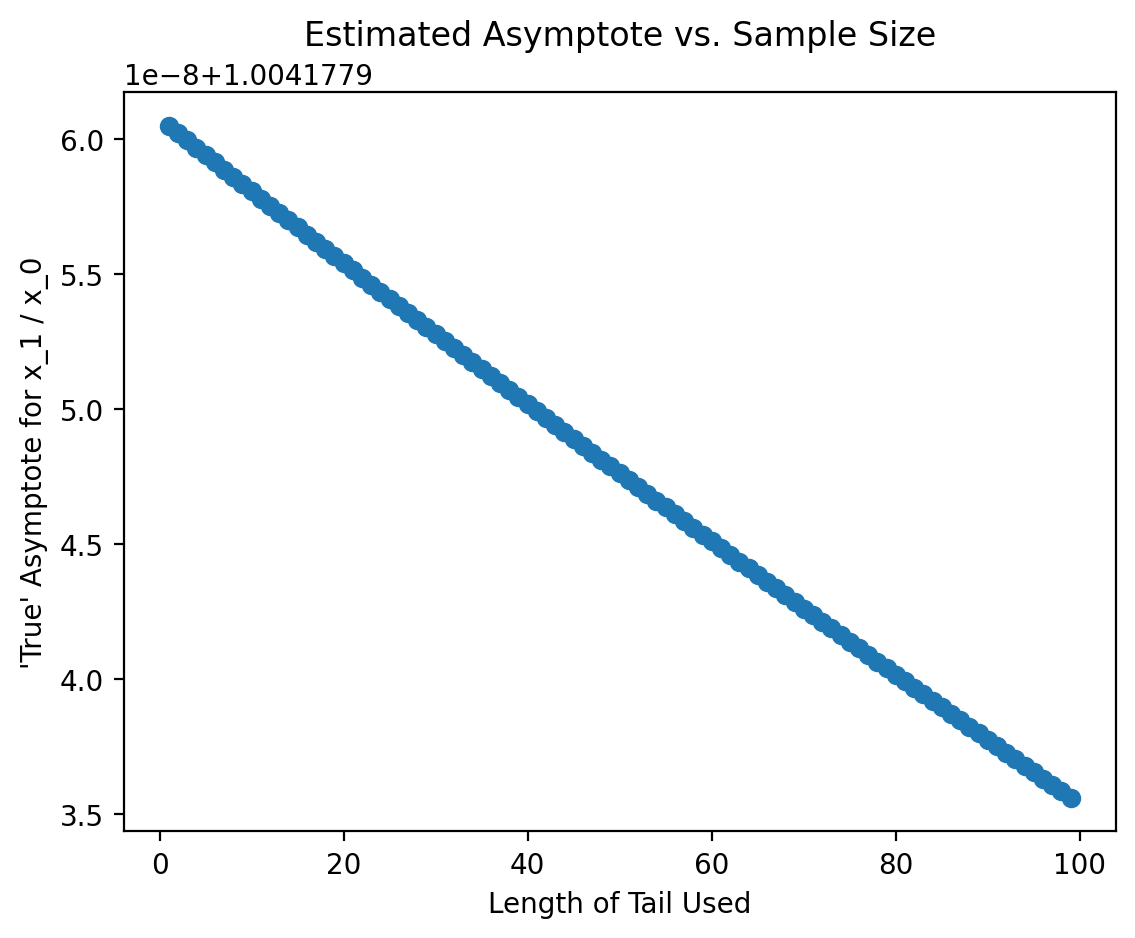

In [34]:
plt.scatter(list(range(1, 100)), sample_size_comparisons[:, 1])
plt.title("Estimated Asymptote vs. Sample Size")
plt.ylabel("'True' Asymptote for x_1 / x_0")
plt.xlabel("Length of Tail Used")

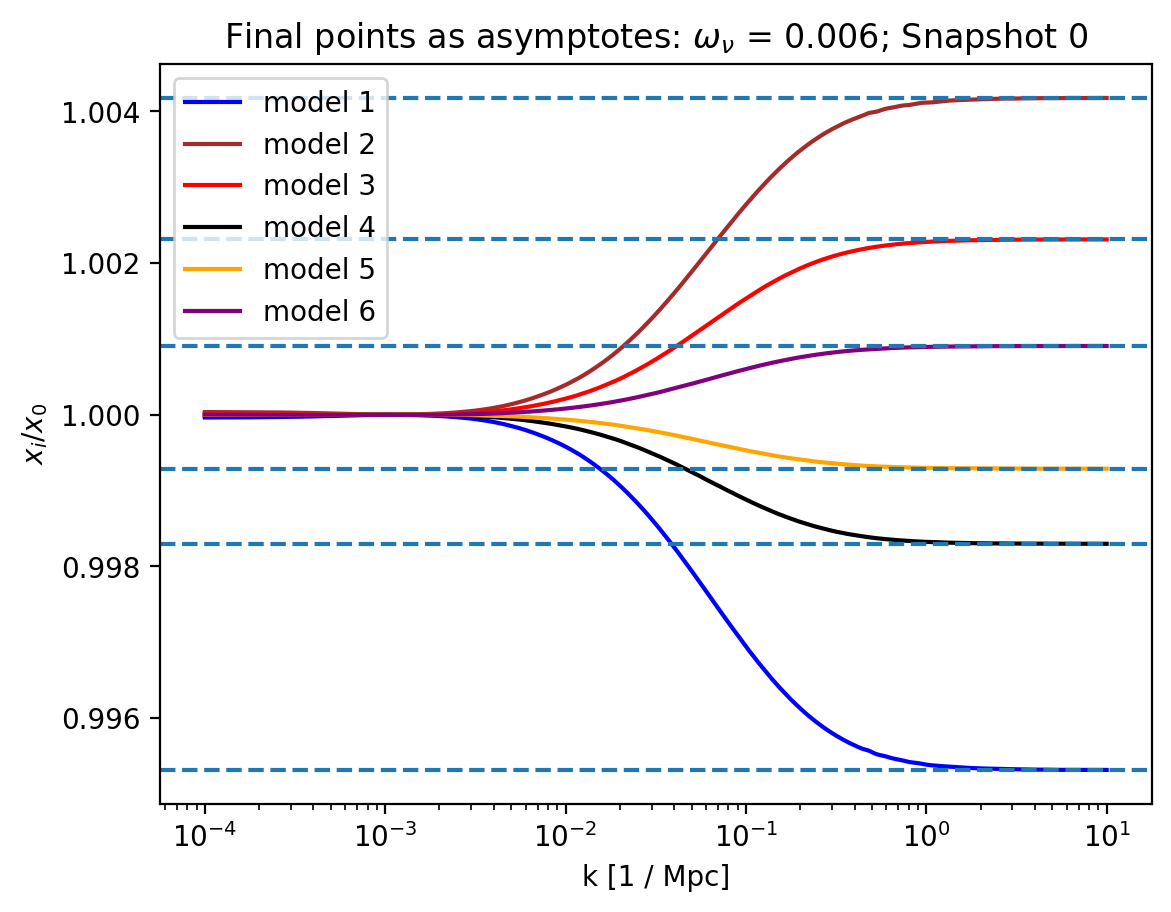

In [33]:
fig, axs = plt.subplots()
spectra.model_ratios_true(snap_index, data, axs,
    massive='x', skips=[7, 8], omnuh2_str=onh2_str,
    title="Final points as asymptotes")
for asymptote in true_asymptotes:
    axs.axhline(asymptote, linestyle='--')